<a href="https://colab.research.google.com/github/grecoserafim/SpaceShip_Titanic/blob/main/SpaceTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC SPACESHIP

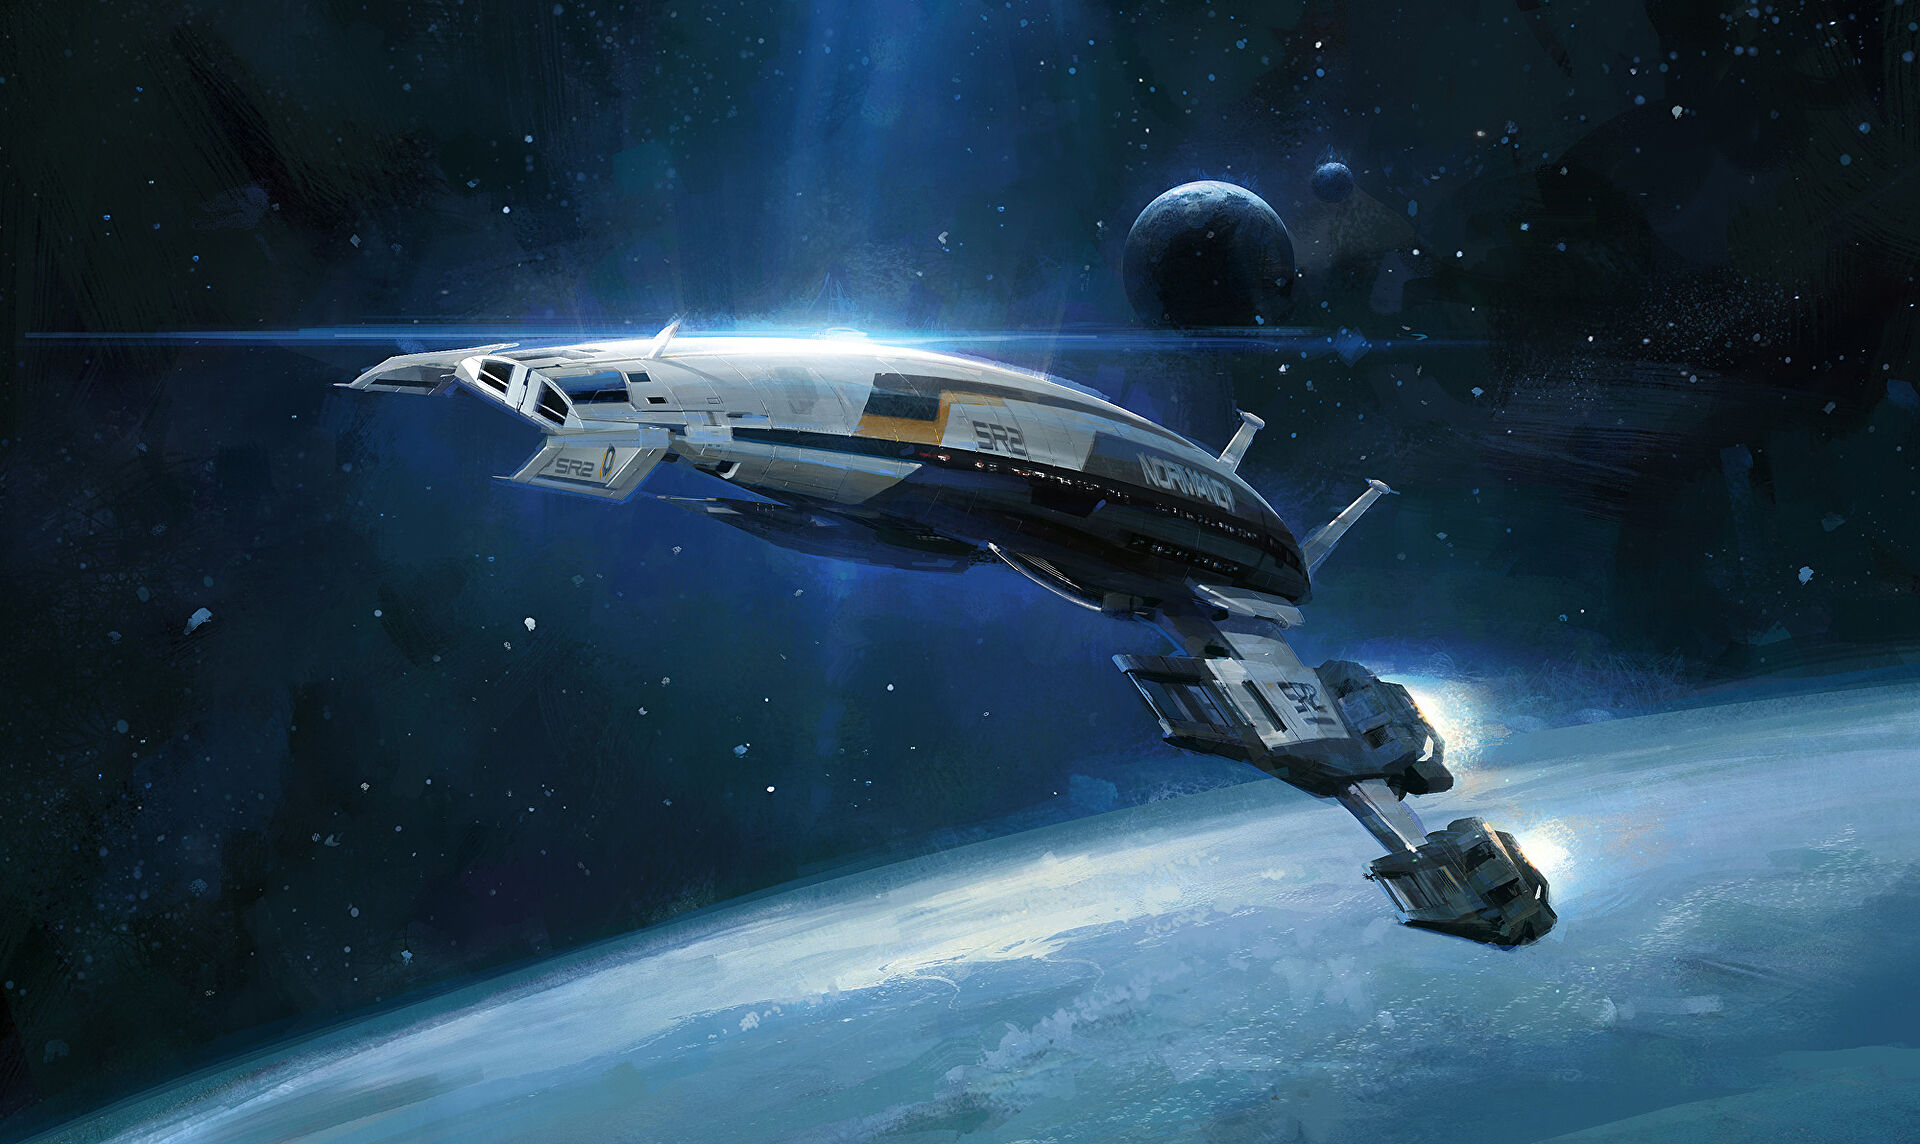

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier



In [45]:
df1 = pd.read_csv('train.csv')

display(df1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


#Tratamento Dados

In [46]:
#separando Cabin em três colunas distintas
df1[['deck', 'num', 'side']] = df1['Cabin'].str.split('/', expand=True)

# removendo a coluna original Cabin
df1.drop('Cabin', axis=1, inplace=True)



In [47]:
#separando PassengerId por Grupos
# função para extrair os 4 primeiros dígitos do PassengerId
def extract_group_passenger_id(passenger_id):
    return passenger_id[:4]

# aplicando a função em cada linha da coluna PassengerId e criando a nova coluna GroupPass
df1['GroupPass'] = df1['PassengerId'].apply(extract_group_passenger_id)

# juntando as duas colunas em um novo dataframe
df = df1[['PassengerId', 'GroupPass']].join(df1.drop(['PassengerId', 'GroupPass'], axis=1))

df = df[['PassengerId', 'GroupPass' , 'HomePlanet', 'CryoSleep', 'deck', 'num', 'side', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name','Transported']]


In [48]:
#definir Clandestino para pessoas que não possuem cabines
df[['deck', 'num', 'side']] = df[['deck', 'num', 'side']].fillna('Clandestino')

In [49]:
#definir categorias para NAN das colunas HomePlanet e Destination
df['HomePlanet'] = df['HomePlanet'].fillna('s/Origem')
df['Destination'] = df['Destination'].fillna('s/Destino')

In [50]:
# obter os valores únicos da coluna HomePlanet
unique_home_planets = df['HomePlanet'].unique()
print('Valores únicos da coluna HomePlanet:')
print(unique_home_planets)

# obter os valores únicos da coluna Destination
unique_destinations = df['Destination'].unique()
print('Valores únicos da coluna Destination:')
print(unique_destinations)

Valores únicos da coluna HomePlanet:
['Europa' 'Earth' 'Mars' 's/Origem']
Valores únicos da coluna Destination:
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 's/Destino']


In [51]:
#Definir 0 nas colunas numéricas
df['CryoSleep'] = df['CryoSleep'].fillna('False')
df[['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall','	VRDeck','Spa']] = df[['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',	'VRDeck','Spa']].fillna(0)


In [52]:

age_mean= df['Age'].mean()
age_mean

28.82793046746535

In [53]:
#Definir idade dos NAN com a média das idades 
df['Age'] = df['Age'].fillna(28.83)

In [55]:
#definir coluna de numero de pessoas que viajam sozinhas ou em grupos e quantos são
counts = df['GroupPass'].value_counts()
df['GroupPass_Count'] = df['GroupPass'].map(counts)

In [56]:
#retirando coluna repetida
df = df.drop(df.columns[-2], axis=1)

In [57]:
#categorização de colunas não numéricas
categorical_cols = ['HomePlanet', 'CryoSleep', 'deck', 'side', 'Destination', 'VIP', 'Transported']

for col in categorical_cols:
    df[col] = pd.factorize(df[col])[0]

In [58]:
categorical_cols_encoded = [col for col in df.columns if col in categorical_cols]


In [85]:
#definindo colunas numéricas
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupPass_Count','VIP']

In [74]:
#definindo variável alvo
categorical_cols = ['HomePlanet', 'CryoSleep', 'deck', 'side', 'Destination' ]
#definindo coluna
y = df['Transported']

In [61]:
df['VRDeck'] = df['VRDeck'].fillna(0)

In [62]:
display(df)

,PassengerId,GroupPass,HomePlanet,CryoSleep,deck,num,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupPass_Count
0,0001_01,0001,0,0,0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1
1,0002_01,0002,1,0,1,0,1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1
2,0003_01,0003,0,0,2,0,1,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,2
3,0003_02,0003,0,0,2,0,1,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,2
4,0004_01,0004,1,0,1,1,1,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,9276,0,0,2,98,0,2,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1
8689,9278_01,9278,1,1,3,1499,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,1
8690,9279_01,9279,1,0,3,1500,1,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1
8691,9280_01,9280,0,0,5,608,1,2,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,2


#Machine Learning

In [68]:
# Separando as variáveis de entrada e de saída
X = df[categorical_cols + numeric_cols]
y = df['Transported']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




rf = RandomForestClassifier(n_estimators=500, random_state=42)
    
# Treinando o modelo
rf.fit(X_train, y_train)
    
# Fazendo previsões no conjunto de teste
y_pred = rf.predict(X_test)
    
# Calculando a acurácia do modelo
acc = accuracy_score(y_test, y_pred)
    
# Imprimindo a acurácia para cada valor de n_estimators
print(f" accuracy = {acc}")

 accuracy = 0.7833588957055214


In [86]:
# Definindo o número de árvores
n_estimators = 500

# Criando o modelo de Random Forest
rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

# Realizando a validação cruzada
scores = cross_val_score(rf, X, y, cv=5)

# Imprimindo as acurácias para cada fold
for i, score in enumerate(scores):
    print(f"Fold {i}: accuracy = {score:.4f}")

# Imprimindo a acurácia média e o desvio padrão
print(f"Mean accuracy = {scores.mean():.4f}")
print(f"Standard deviation = {scores.std():.4f}")

Fold 0: accuracy = 0.7803
Fold 1: accuracy = 0.7677
Fold 2: accuracy = 0.7838
Fold 3: accuracy = 0.7888
Fold 4: accuracy = 0.7969
Mean accuracy = 0.7835
Standard deviation = 0.0097


In [87]:
# Separando as variáveis de entrada e de saída
X = df[categorical_cols + numeric_cols]
y = df['Transported']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os valores que serão testados para o hiperparâmetro n_estimators
n_estimators = [5,50,500]

# Criando o modelo XGBoost
xgb = XGBClassifier(random_state=42)

# Definindo os valores dos hiperparâmetros que serão testados com o GridSearchCV
param_grid = {'n_estimators': n_estimators}

# Criando o objeto GridSearchCV com o modelo e os hiperparâmetros definidos
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# Treinando o modelo com o GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimindo a acurácia para cada valor de n_estimators
for n, acc in zip(n_estimators, grid_search.cv_results_['mean_test_score']):
    print(f"n_estimators = {n}: accuracy = {acc}")

n_estimators = 5: accuracy = 0.7963845521774856
n_estimators = 50: accuracy = 0.7991783073130649
n_estimators = 500: accuracy = 0.7814297452752671


In [88]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Separando as variáveis de entrada e de saída
X = df[categorical_cols + numeric_cols]
y = df['Transported']

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo os valores que serão testados para o hiperparâmetro n_estimators
n_estimators = [5, 50, 500]

# Criando o modelo LGBM
lgbm = LGBMClassifier(random_state=42)

# Definindo os valores dos hiperparâmetros que serão testados com o GridSearchCV
param_grid = {'n_estimators': n_estimators}

# Criando o objeto GridSearchCV com o modelo e os hiperparâmetros definidos
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')

# Treinando o modelo com o GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimindo a acurácia para cada valor de n_estimators
for n, acc in zip(n_estimators, grid_search.cv_results_['mean_test_score']):
    print(f"n_estimators = {n}: accuracy = {acc}")

n_estimators = 5: accuracy = 0.7858668857847164
n_estimators = 50: accuracy = 0.8046014790468364
n_estimators = 500: accuracy = 0.7939194741166803


# O melhor resultado de Machine Learning foi atráves do LGBM
#com 0,8046 de precisão